# NFL Combine Classification Modeling

## Exploratory Data Analysis

## Project Goals

- Determine the influence the NFL Combine has on a lineman (offensive linemen and defensive linemen) prospect's draft status (getting drafted or not).
- Discover which NFL Combine drills have the most impact on a lineman (offensive linemen and defensive linemen) prospect's draft position.
- Reveal how much the NFL Combine factors in on a lineman (offensive linemen and defensive linemen) prospect's draft value (how early or how late a prospect gets drafted, if at all). **(*FUTURE WORK*)**

## Summary of Data

The dataset that was analyzed for this study contains 9,544 observations of NFL Combine and NFL Draft data, dating from 1987-2017. The NFL Combine data primarily displays the performance of players over that time period in combine drills. The NFL Draft data contains the draft pick information of players from that time span, including what round they were selected in and the team that picked them.

### Library Import

Below, we import the necessary libraries that will be used for our technical work.

In [1]:
#Import libraries
%run ../python_files/libraries
%matplotlib inline
# from libraries import *    #for use within .py file

/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/michaelpallante/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  dep

## Data Importing, Data Merging, and Data Cleaning

Below, we import the NFL Combine and NFL Draft data, getting them both prepared and cleaned for modeling purposes.

In [2]:
# import NFL Combine and NFL Draft data
nfl_combine_df = pd.read_csv('../data/nfl_combine_cleaned.csv')
nfl_draft_df = pd.read_csv('../data/nfl_draft_data.csv')

# quick overview of the NFL Combine dataset
nfl_combine_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,0,0,0,0,0,0,0,0,1
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,0,0,0,0,0,0,0,1,1
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,0,0,0,0,0,0,0,0,0
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,0,0,0,0,0,0,0,0,1
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9517,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,NaN,0,0,0,1,0,0,0,0,1
9518,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1
9519,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,NaN,0,0,0,0,0,0,0,0,1
9520,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,NaN,0,0,0,0,0,0,0,0,1


In the NFL Combine dataframe, we see players' performance and measurements from the combine, dating from 1987-2017.

In [3]:
# quick overview of the NFL Draft dataset
nfl_draft_df

,player_name,first_name,last_name,combine_year,round,pick,team
0,jameis_winston,jameis,winston,2015,1,1,tb
1,marcus_mariota,marcus,mariota,2015,1,2,ten
2,dante_fowler,dante,fowler,2015,1,3,jax
3,amari_cooper,amari,cooper,2015,1,4,oak
4,brandon_scherff,brandon,scherff,2015,1,5,was
...,...,...,...,...,...,...,...
8174,xavier_woods,xavier,woods,2017,6,191,dal
8175,zach_banner,zach,banner,2017,4,137,ind
8176,zach_cunningham,zach,cunningham,2017,2,57,hou
8177,zane_gonzalez,zane,gonzalez,2017,7,224,cle


In the NFL Draft dataframe, we see players' draft pick information, dating from 1987-2017, including what round they were selected in and which team picked them.

In [4]:
# merge the NFL Combine and NFL Draft datasets with an outer join so that all values and rows are retained
nfl_merged_df = pd.merge(nfl_combine_df, nfl_draft_df, how = 'left', on = ['player_name', 'last_name',
                                                                                'first_name', 'combine_year'])

# impute round and pick values to reflect undrafted players. round '13' means undrafted (draft lasts only 12 rounds)
# and pick '337' means undrafted (only 336 players get drafted). 'udfa' means no team drafted the players, therefore
# making them undrafted free agents (udfa).
nfl_merged_df['round'].fillna('13', inplace=True)
nfl_merged_df['pick'].fillna('337', inplace=True)
nfl_merged_df['team'].fillna('udfa', inplace=True)

# change round and pick variables to integer values
nfl_merged_df['round'] = nfl_merged_df['round'].astype(int)
nfl_merged_df['pick'] = nfl_merged_df['pick'].astype(int)

# quick overview of nfl_df dataset
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed,round,pick,team
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,NaN,0,0,0,0,0,0,0,0,1,1,6,nyj
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,NaN,0,0,0,0,0,0,0,1,1,3,93,gb
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,11.39,0,0,0,0,0,0,0,0,0,5,170,min
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,NaN,0,0,0,0,0,0,0,0,1,13,337,udfa
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,NaN,0,0,0,0,0,0,0,0,1,5,173,pit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,NaN,0,0,0,1,0,0,0,0,1,1,1,tb
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,1,13,337,udfa
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,NaN,0,0,0,0,0,0,0,0,1,4,113,det
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,NaN,0,0,0,0,0,0,0,0,1,2,36,jax


We merged the NFL Combine and NFL Draft dataframes into one merged NFL dataset. We instantly notice that some players do not have a draft round/pick or a team that selected them. This is because those players went undrafted in their respective draft years. To compensate for that, we need to impute these empty cells with the following values: round '13' means undrafted (draft lasts only 12 rounds); pick '337' means undrafted (only 336 players get drafted); 'udfa' means no team drafted the players, therefore making them undrafted free agents (udfa).

In [5]:
# quick review of the variables in the NFL merged dataset
nfl_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 29 columns):
player_name                    9544 non-null object
first_name                     9544 non-null object
last_name                      9544 non-null object
college                        9544 non-null object
position                       9544 non-null object
combine_year                   9544 non-null int64
height_inches                  9544 non-null float64
weight_lbs                     9544 non-null int64
hand_size_inches               8413 non-null float64
arm_length_inches              8095 non-null float64
40_yard_dash                   8670 non-null float64
bench_press_reps               6779 non-null float64
vertical_leap_inches           8056 non-null float64
broad_jump_inches              7908 non-null float64
3_cone_drill                   4510 non-null float64
20_yard_shuttle                7178 non-null float64
60_yard_shuttle                3175 non-null float64
h

In [6]:
# quick review of the characteristics of the feature variables in the dataset
nfl_merged_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,60_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,60_yard_shuttle_missed,round,pick
count,9544.000000,9544.000000,9544.000000,8413.000000,8095.000000,8670.000000,6779.000000,8056.000000,7908.000000,4510.000000,7178.000000,3175.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000
mean,2001.615675,73.739848,240.252410,9.528350,32.220723,4.831063,19.829473,32.006703,112.318032,7.345909,4.403415,11.674400,0.118504,0.151823,0.091576,0.289711,0.155909,0.171417,0.527452,0.247904,0.667330,7.426970,198.624581
std,9.093656,2.643758,44.993302,0.629206,1.498260,0.310541,6.538973,4.202374,9.307441,0.446774,0.268862,0.425573,0.323221,0.358868,0.288441,0.453652,0.362789,0.376892,0.499272,0.431819,0.471194,4.613548,120.381940
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,10.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1993.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,11.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,88.000000
50%,2001.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.370000,11.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000,188.000000
75%,2010.000000,75.750000,275.000000,10.000000,33.250000,5.050000,24.000000,35.000000,119.000000,7.620000,4.570000,11.930000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,13.000000,337.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,13.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,337.000000


In [7]:
# check the number of missing values in the NFL merged dataset
nfl_merged_df.isna().sum()

player_name                       0
first_name                        0
last_name                         0
college                           0
position                          0
combine_year                      0
height_inches                     0
weight_lbs                        0
hand_size_inches               1131
arm_length_inches              1449
40_yard_dash                    874
bench_press_reps               2765
vertical_leap_inches           1488
broad_jump_inches              1636
3_cone_drill                   5034
20_yard_shuttle                2366
60_yard_shuttle                6369
hand_size_inches_missed           0
arm_length_inches_missed          0
40_yard_dash_missed               0
bench_press_reps_missed           0
vertical_leap_inches_missed       0
broad_jump_inches_missed          0
3_cone_drill_missed               0
20_yard_shuttle_missed            0
60_yard_shuttle_missed            0
round                             0
pick                        

Since the 60_yard_shuttle column is missing almost 70% of the total observations, we decided that it would be best to remove this column, as majority of the players within our data did not participate in this drill. This also means we need to remove the 60_yard_shuttle_missed column, as it is no longer needed. We are keeping all other columns for further evaluation. One could argue that we should consider removing the 3_cone_drill column as well, due to a large number of missing values, but we have identified this drill as one that could be significant in determining player draft stock.

In [8]:
nfl_merged_df = nfl_merged_df.drop(['60_yard_shuttle', '60_yard_shuttle_missed'], axis = 1)
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,team
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,0,0,0,0,0,0,0,0,1,6,nyj
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,0,0,0,0,0,0,0,1,3,93,gb
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,0,0,0,0,0,0,0,0,5,170,min
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,0,0,0,0,0,0,0,0,13,337,udfa
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,0,0,0,0,0,0,0,0,5,173,pit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,0,0,0,1,0,0,0,0,1,1,tb
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,13,337,udfa
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,0,0,0,0,0,0,0,0,4,113,det
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,0,0,0,0,0,0,0,0,2,36,jax


Our merged NFL dataframe containing both NFL Combine and NFL Draft data is now ready for further preparation.

## Data Transformations

Below, we use data transformations to create our two primary response variables for modeling purposes. First, we create the draft_status column, which shows whether a player was drafted or undrafted in the NFL Draft '1' means the player was drafted and '0' means the player was undrafted). We then create the draft_value column, which shows us how early or late a player was selected in the NFL Draft, and also if they went undrafted ['1' means the player was a Day 1 draft pick (selected in Round 1); '2' means the player was a Day 2 draft pick (selected in Rounds 2-3); '3' means the player was a Day 3 draft pick (selected in Rounds 4-7); '4' means the player was selected in Rounds 8-12 (the draft used to follow a 12 round format until 1993. 1993 draft was 8 rounds. 1994-present drafts are 7 rounds); '5' means the player was undrafted].

In [9]:
# created draft_status column. '1' means the player was drafted and '0' means the player was undrafted
nfl_merged_df['draft_status'] = nfl_merged_df['round'].astype(str).map({'1': 1, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1,
                                                                        '7': 1, '8': 1, '9': 1, '10': 1, '11': 1,
                                                                        '12': 1, '13': 0})

# created draft_value column. '1' means the player was a Day 1 draft pick (selected in Round 1), '2' means the player
# was a Day 2 draft pick (selected in Rounds 2-3), '3' means the player was a Day 3 draft pick (selected in
# Rounds 4-7), '4' means the player was selected in Rounds 8-12 (the draft used to follow a 12 round format until
# 1993. 1993 draft was 8 rounds. 1994-present drafts are 7 rounds.), '5' means the player was undrafted.
nfl_merged_df['draft_value'] = nfl_merged_df['round'].astype(str).map({'1': 1, '2': 2, '3': 2, '4': 3, '5': 3, '6': 3, 
                                                                       '7': 3, '8': 4, '9': 4, '10': 4, '11': 4,
                                                                       '12': 4, '13': 5})

In [10]:
nfl_merged_df

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,team,draft_status,draft_value
0,jamal_adams,jamal,adams,louisiana_state,db,2017,71.63,214,9.25,33.38,4.56,18.0,31.5,120.0,6.96,4.13,0,0,0,0,0,0,0,0,1,6,nyj,1,1
1,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,0,0,0,0,0,0,0,1,3,93,gb,1,2
2,rodney_adams,rodney,adams,south_florida,wr,2017,73.25,189,9.00,32.00,4.44,8.0,29.5,125.0,6.98,4.28,0,0,0,0,0,0,0,0,5,170,min,1,3
3,quincy_adeboyejo,quincy,adeboyejo,mississippi,wr,2017,74.75,197,9.38,31.75,4.42,8.0,34.5,123.0,6.73,4.14,0,0,0,0,0,0,0,0,13,337,udfa,0,5
4,brian_allen,brian,allen,utah,db,2017,74.88,215,10.00,34.00,4.48,15.0,34.5,117.0,6.64,4.34,0,0,0,0,0,0,0,0,5,173,pit,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,jameis_winston,jameis,winston,floridastate,qb,2015,76.00,231,9.38,32.00,4.97,NaN,28.5,103.0,7.16,4.36,0,0,0,1,0,0,0,0,1,1,tb,1,1
9540,cam_worthy,cam,worthy,eastcarolinanc,wr,2015,74.00,211,10.13,33.50,4.59,12.0,NaN,NaN,NaN,NaN,0,0,0,0,1,1,1,1,13,337,udfa,0,5
9541,gabe_wright,gabe,wright,auburn,dl,2015,75.00,300,10.75,32.63,5.07,34.0,26.5,100.0,7.73,4.56,0,0,0,0,0,0,0,0,4,113,det,1,3
9542,tj_yeldon,tj,yeldon,alabama,rb,2015,73.00,226,9.00,31.63,4.61,22.0,36.0,117.0,7.19,4.22,0,0,0,0,0,0,0,0,2,36,jax,1,2


In [11]:
nfl_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9544 entries, 0 to 9543
Data columns (total 29 columns):
player_name                    9544 non-null object
first_name                     9544 non-null object
last_name                      9544 non-null object
college                        9544 non-null object
position                       9544 non-null object
combine_year                   9544 non-null int64
height_inches                  9544 non-null float64
weight_lbs                     9544 non-null int64
hand_size_inches               8413 non-null float64
arm_length_inches              8095 non-null float64
40_yard_dash                   8670 non-null float64
bench_press_reps               6779 non-null float64
vertical_leap_inches           8056 non-null float64
broad_jump_inches              7908 non-null float64
3_cone_drill                   4510 non-null float64
20_yard_shuttle                7178 non-null float64
hand_size_inches_missed        9544 non-null int64
arm

In [12]:
nfl_merged_df.describe()

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,draft_status,draft_value
count,9544.000000,9544.000000,9544.000000,8413.000000,8095.000000,8670.000000,6779.000000,8056.000000,7908.000000,4510.000000,7178.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000,9544.000000
mean,2001.615675,73.739848,240.252410,9.528350,32.220723,4.831063,19.829473,32.006703,112.318032,7.345909,4.403415,0.118504,0.151823,0.091576,0.289711,0.155909,0.171417,0.527452,0.247904,7.426970,198.624581,0.640612,3.410310
std,9.093656,2.643758,44.993302,0.629206,1.498260,0.310541,6.538973,4.202374,9.307441,0.446774,0.268862,0.323221,0.358868,0.288441,0.453652,0.362789,0.376892,0.499272,0.431819,4.613548,120.381940,0.479846,1.357783
min,1987.000000,64.900000,142.000000,7.130000,25.630000,4.210000,1.000000,17.500000,7.000000,6.340000,3.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,1993.000000,71.880000,203.000000,9.130000,31.250000,4.590000,15.000000,29.000000,106.000000,7.010000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,88.000000,0.000000,2.000000
50%,2001.000000,74.000000,232.000000,9.500000,32.250000,4.760000,20.000000,32.000000,113.000000,7.260000,4.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,188.000000,1.000000,3.000000
75%,2010.000000,75.750000,275.000000,10.000000,33.250000,5.050000,24.000000,35.000000,119.000000,7.620000,4.570000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,13.000000,337.000000,1.000000,5.000000
max,2017.000000,82.400000,387.000000,11.880000,38.500000,6.120000,51.000000,46.000000,147.000000,9.610000,5.680000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,337.000000,1.000000,5.000000


Our updated NFL merged dataset is now ready for some intial evaluation, before we split the data into training and test datasets for modeling and also consider data imputation.

## Create Linemen (Offensive Linemen and Defensive Linemen) Dataframe

For the purposes our this study, we split our data into a dataframe containing only offensive and defensive linemen. This dataframe will be called 'linemen'.

In [13]:
linemen = nfl_merged_df.loc[(nfl_merged_df.position == 'dl') |(nfl_merged_df.position == 'ol')]
linemen = linemen.reset_index(drop=True)
linemen.head()

,player_name,first_name,last_name,college,position,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,team,draft_status,draft_value
0,montravius_adams,montravius,adams,auburn,dl,2017,75.63,304,9.25,32.75,4.87,22.0,29.0,108.0,7.62,NaN,0,0,0,0,0,0,0,1,3,93,gb,1,2
1,jonathan_allen,jonathan,allen,alabama,dl,2017,74.63,286,9.38,33.63,5.00,21.0,30.0,108.0,7.49,4.44,0,0,0,0,0,0,0,0,1,17,was,1,1
2,gavin_andrews,gavin,andrews,oregon_state,ol,2017,77.00,340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.09,1,1,1,1,1,1,1,0,13,337,udfa,0,5
3,isaac_asiata,isaac,asiata,utah,ol,2017,75.13,323,10.38,33.75,5.34,35.0,25.5,102.0,7.83,4.93,0,0,0,0,0,0,0,0,5,164,mia,1,3
4,erik_austell,erik,austell,charleston_southern,ol,2017,75.13,301,9.00,32.00,5.23,24.0,27.5,107.0,8.13,4.90,0,0,0,0,0,0,0,0,13,337,udfa,0,5


In [14]:
linemen.shape

(3098, 29)

In [15]:
linemen.position.value_counts()

ol    1642
dl    1456
Name: position, dtype: int64

Our linemen dataframe contains 3098 total linemen, including 1642 offensive linemen and 1456 defensive linemen. This dataframe is now ready for further evaluation.

## Initial Findings and Data Visualizations

### Correlations

In [16]:
# Correlations between all variables in the linemen dataset
linemen.corr(method = 'pearson')

,combine_year,height_inches,weight_lbs,hand_size_inches,arm_length_inches,40_yard_dash,bench_press_reps,vertical_leap_inches,broad_jump_inches,3_cone_drill,20_yard_shuttle,hand_size_inches_missed,arm_length_inches_missed,40_yard_dash_missed,bench_press_reps_missed,vertical_leap_inches_missed,broad_jump_inches_missed,3_cone_drill_missed,20_yard_shuttle_missed,round,pick,draft_status,draft_value
combine_year,1.000000,0.031777,0.282143,0.134493,0.195253,-0.142530,0.303996,0.170626,0.130401,-0.299907,-0.030226,0.013573,-0.140532,-0.147064,0.018889,0.008828,0.024284,-0.582969,0.007530,-0.079132,-0.044108,0.002400,-0.074394
height_inches,0.031777,1.000000,0.248399,0.153805,0.404667,0.189484,-0.166030,-0.106066,-0.076499,0.119742,0.178853,0.012960,0.029562,0.009201,0.033615,-0.012664,-0.003109,-0.051795,-0.020240,-0.070348,-0.073217,0.037204,-0.073635
weight_lbs,0.282143,0.248399,1.000000,0.176504,0.210265,0.619305,0.270324,-0.431270,-0.525848,0.579037,0.526486,-0.001341,-0.081994,-0.039087,0.002734,0.031405,0.059366,-0.208269,0.017621,-0.044997,-0.034266,0.007001,-0.038552
hand_size_inches,0.134493,0.153805,0.176504,1.000000,0.254454,0.076662,0.054801,0.032355,0.008707,0.109278,0.063212,NaN,-0.060281,0.014131,0.023652,0.019869,0.037922,-0.057620,0.041566,-0.093729,-0.087793,0.067700,-0.097594
arm_length_inches,0.195253,0.404667,0.210265,0.254454,1.000000,0.034994,-0.073281,0.049779,0.104928,0.135738,0.173528,0.035478,NaN,0.017774,0.053697,0.018564,0.047011,-0.098229,0.067680,-0.120088,-0.119577,0.053216,-0.125338
40_yard_dash,-0.142530,0.189484,0.619305,0.076662,0.034994,1.000000,-0.093710,-0.677683,-0.712851,0.675859,0.643035,-0.032388,-0.043724,NaN,0.012647,-0.037315,-0.011516,0.062334,-0.064078,0.286039,0.286133,-0.236490,0.293341
bench_press_reps,0.303996,-0.166030,0.270324,0.054801,-0.073281,-0.093710,1.000000,0.127963,0.065208,-0.089435,-0.044915,0.020463,-0.020893,-0.041636,NaN,0.053253,0.062572,-0.178018,0.061034,-0.150479,-0.140724,0.102656,-0.147780
vertical_leap_inches,0.170626,-0.106066,-0.431270,0.032355,0.049779,-0.677683,0.127963,1.000000,0.709986,-0.520303,-0.574107,0.038005,-0.004396,-0.002606,-0.004945,NaN,-0.060006,-0.186107,0.041039,-0.234589,-0.226836,0.182763,-0.240039
broad_jump_inches,0.130401,-0.076499,-0.525848,0.008707,0.104928,-0.712851,0.065208,0.709986,1.000000,-0.594431,-0.572117,-0.031417,-0.036373,0.001842,-0.017366,-0.039140,NaN,-0.058260,0.052417,-0.231303,-0.234215,0.176920,-0.236423
3_cone_drill,-0.299907,0.119742,0.579037,0.109278,0.135738,0.675859,-0.089435,-0.520303,-0.594431,1.000000,0.710037,0.003884,0.010811,-0.032327,0.015280,0.015339,0.039122,NaN,-0.052571,0.234520,0.226134,-0.215768,0.243606


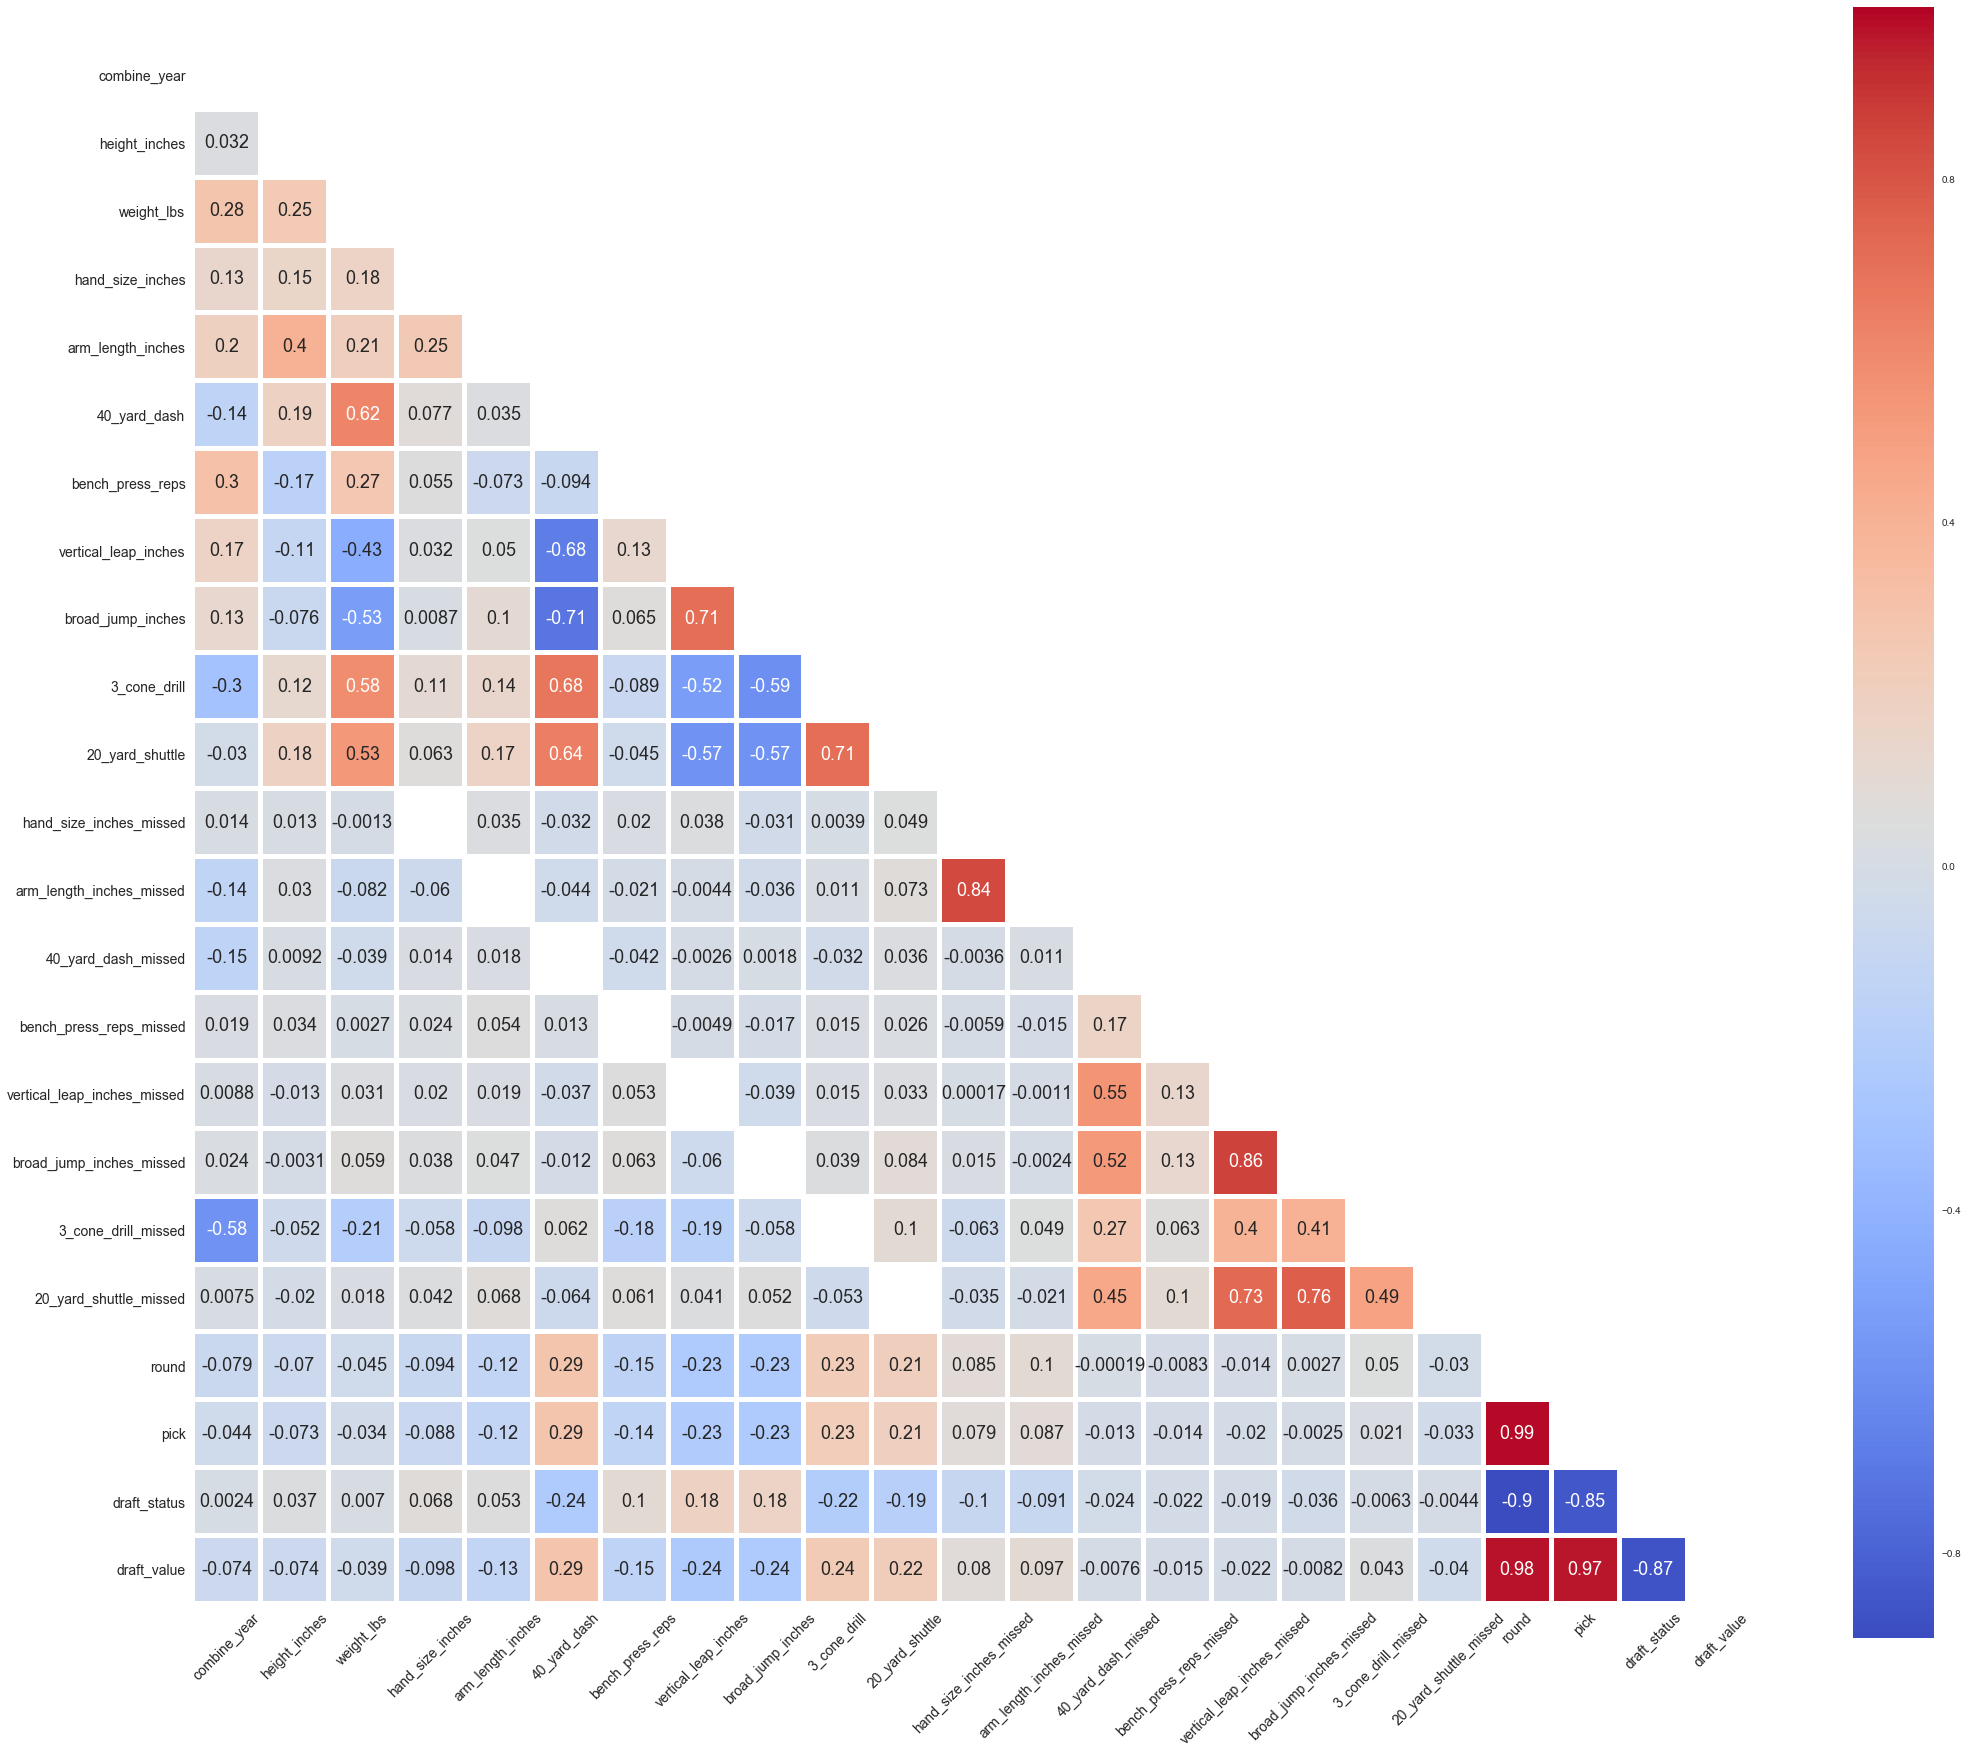

In [17]:
#Correlation Heatmap of all variables in the linemen dataset

mask = np.zeros_like(linemen.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

plt.figure(figsize=(35,30))
ax = sns.heatmap(linemen.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Distribution of Linemen Combine Drills

In [18]:
#

### Distribution of Linemen Draft Status

In [19]:
#

### Distribution of Linemen Draft Status over Time

In [20]:
#

## Train and Test Dataset Creation

We split our NFL linemen dataframe using a 80%-20% training and test split. We also randomized the selection of observations so that we did not bias the data. We completed this process twice: once for our draft_status model and once for our draft_value model.

In [21]:
# Split nfl_merged_df into train and test datasets for our draft_status and draft_value models,
# using a randomized 80/20 split

#features for all models
features_linemen = linemen.iloc[:,6:24]

#train and test datasets for draft_status model
draft_status = linemen['draft_status']
x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(features_linemen, draft_status, test_size = 0.2, random_state = 10)
x_train_ds = x_train_ds.reset_index(drop=True)
x_test_ds = x_test_ds.reset_index(drop=True)
y_train_ds = y_train_ds.reset_index(drop=True)
y_test_ds = y_test_ds.reset_index(drop=True)

#train and test datasets for draft_value model
draft_value = linemen['draft_value']
x_train_dv, x_test_dv, y_train_dv, y_test_dv = train_test_split(features_linemen, draft_value, test_size = 0.2, random_state = 10)
x_train_dv = x_train_dv.reset_index(drop=True)
x_test_dv = x_test_dv.reset_index(drop=True)
y_train_dv = y_train_dv.reset_index(drop=True)
y_test_dv = y_test_dv.reset_index(drop=True)

In [22]:
features_linemen.shape

(3098, 18)

We have 2 different response variables that will each be used in their own model: one is draft_status and one is draft_value. There are 18 feature variables that will be used in our models as explanatory variables.

## Data Imputation

### Linear Regression Imputation

We determined that linear regression imputation would be best for filling out missing observations for our models, as this gives us predicted values for our linemen in their combine drills, while still preserving the variance and randomization of our data over time.

In [23]:
linemen = linemen.drop(['round','pick','team','draft_value'], axis=1)

drills = ['hand_size_inches', 'arm_length_inches', '40_yard_dash', 'bench_press_reps', 'vertical_leap_inches',
          'broad_jump_inches', '3_cone_drill', '20_yard_shuttle']

In [24]:
# create function to display number of missing drills by position

def missing_drills(df,pos):
    print(pos)
    print(df.loc[df.position == pos, drills].shape, '\n')
    print(df.loc[df.position == pos, drills].isnull().sum(), '\n', '\n')
    
# compute number of missing drills for offensive and defensive linemen    
missing_drills(linemen,'ol')
missing_drills(linemen,'dl')

ol
(1642, 8) 

hand_size_inches        199
arm_length_inches       249
40_yard_dash            112
bench_press_reps        233
vertical_leap_inches    234
broad_jump_inches       287
3_cone_drill            800
20_yard_shuttle         302
dtype: int64 
 

dl
(1456, 8) 

hand_size_inches        171
arm_length_inches       205
40_yard_dash            105
bench_press_reps        237
vertical_leap_inches    226
broad_jump_inches       259
3_cone_drill            703
20_yard_shuttle         336
dtype: int64 
 



In [25]:
# KNN imputation variable
imputer = KNNImputer(n_neighbors=5, copy=True)

# base imputation for our missing values in our draft_status model, using KNN imputation
knn_train_ds = pd.DataFrame(imputer.fit_transform(x_train_ds))
knn_test_ds = pd.DataFrame(imputer.fit_transform(x_test_ds))

# base imputation for our missing values in our draft_value model, using KNN imputation
knn_train_dv = pd.DataFrame(imputer.fit_transform(x_train_dv))
knn_test_dv = pd.DataFrame(imputer.fit_transform(x_test_dv))

In [26]:
# linemen columns that contain missing data
missing_cols = linemen.isnull().sum()[linemen.isnull().sum() > 0].index
missing_cols

Index(['hand_size_inches', 'arm_length_inches', '40_yard_dash',
       'bench_press_reps', 'vertical_leap_inches', 'broad_jump_inches',
       '3_cone_drill', '20_yard_shuttle'],
      dtype='object')

In [27]:
linemen = x_train_ds
linemen2 = x_test_ds

In [28]:
for index, col in enumerate(x_train_ds.columns):
    if col in missing_cols:
#         print(index, col, 'MISSING')
        linemen[col + '_imp'] = knn_train_ds[index]
    else:
#         print(index,col)
        continue

In [29]:
for index, col in enumerate(x_test_ds.columns):
    if col in missing_cols:
#         print(index, col, 'MISSING')
        linemen2[col + '_imp'] = knn_test_ds[index]
    else:
#         print(index,col)
        continue

In [30]:
# model_df = linemen.select_dtypes(include=['int','float'])
model_df = linemen.drop(missing_cols,axis=1)
model_df2 = linemen2.drop(missing_cols,axis=1)
# model_df = model_df.drop('combine_year',axis=1)

In [31]:
for feature in missing_cols:
        X = model_df.drop(feature+'_imp', axis=1)
        y = model_df[feature+'_imp']
        model = LinearRegression()
        model.fit(X,y)
        x_train_ds.loc[x_train_ds[feature].isnull(), feature] = model.predict(linemen[model_df.columns].drop(feature+'_imp', axis=1))[linemen[feature].isnull()]
        

In [32]:
for feature in missing_cols:
        X = model_df2.drop(feature+'_imp', axis=1)
        y = model_df2[feature+'_imp']
        model = LinearRegression()
        model.fit(X,y)
        x_test_ds.loc[x_test_ds[feature].isnull(), feature] = model.predict(linemen2[model_df2.columns].drop(feature+'_imp', axis=1))[linemen2[feature].isnull()]

Now, our 'x' training and test datasets for both of our models have been imputed.

Below, we remove the KNN imputation columns that were used to predict our missing values in our original columns, as they are no longer needed.

In [35]:
x_train_ds = x_train_ds.iloc[:, :-8]
x_test_ds = x_test_ds.iloc[:, :-8]

Now, our training and test datasets for both of our models are ready for modeling purposes. In order to prevent data leakage, we do not impute for our 'y' training and test datasets.

**To review our model implementation and model performance, please see our [Technical Notebook](https://github.com/michaelpallante/nfl_combine_classification_modeling/blob/master/notebooks/nfl_combine_technical_notebook.ipynb).**